In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # import kmeans

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.datasets import make_blobs

# Generating sample data
X, y = make_blobs(n_samples=3000, centers=6, random_state=42)

In [24]:
X.shape, y.shape

((3000, 2), (3000,))

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [36]:
labels = kmeans.labels_ # get the labels
centroids = kmeans.cluster_centers_ # get the centroids

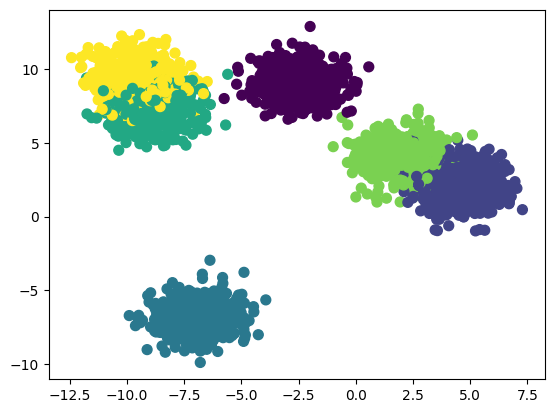

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

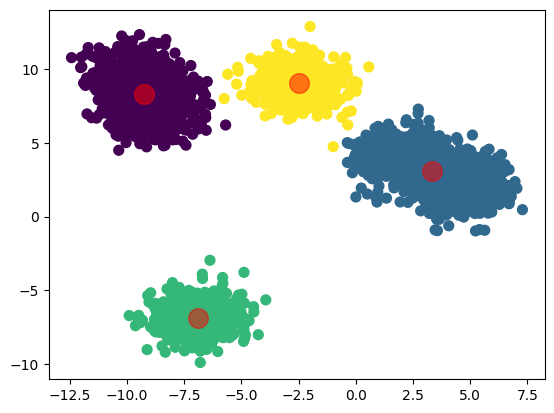

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

kmeans.inertia_ gives the sum of squared distances of samples to their closest cluster center.

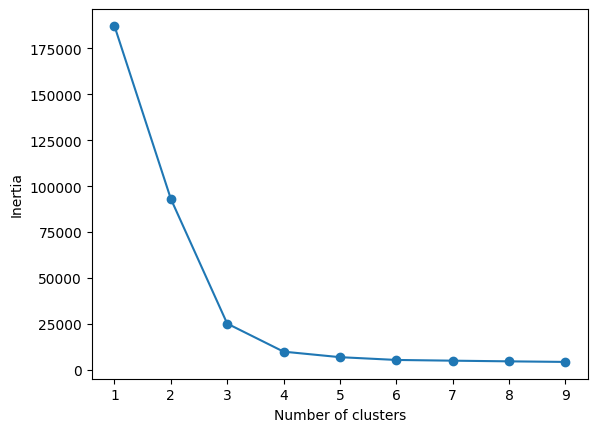

In [34]:
# Using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Hierarchical Clustering

We have two types of hierarchical clustering: Agglomerative and Divisive.
- Agglomerative: Start with each sample as a separate cluster and merge the closest pairs of clusters until only one cluster remains.
- Divisive: Start with all samples in one cluster and split the farthest sample until each sample is in its own cluster.

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [40]:
linked = linkage(X, 'ward')

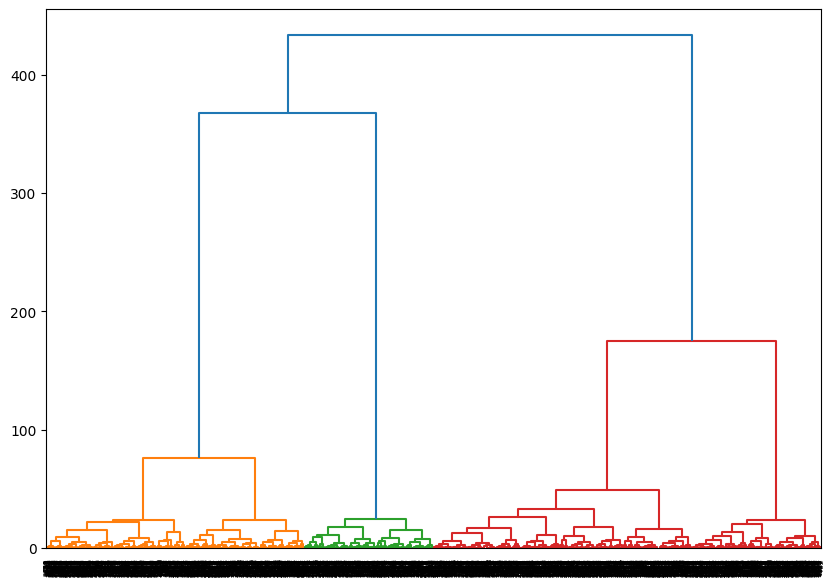

In [41]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [43]:
# create clusters
from scipy.cluster.hierarchy import fcluster

# Using a threshold distance
max_d = 100
clusters = fcluster(linked, max_d, criterion='distance')

# check unique clusters
np.unique(clusters)

array([1, 2, 3, 4], dtype=int32)

In [44]:
# Alternatively, specifying the number of clusters
k = 4
clusters = fcluster(linked, k, criterion='maxclust')
# check unique clusters
np.unique(clusters)

array([1, 2, 3, 4], dtype=int32)